# Problem Statement

## Data Analytics Project- Sales Data Analysis using Python
Analyse the sales data generated by the e-commerce sites such as Amazon, Flipkart, Myntra, etc., to answer the following questions:

Q1) Which month is best for selling products?

Q2) Which city orders the highest number of products?

Q3) What time of the day do people order the most goods online?

Q4) Which product has the highest demand and why?


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
sns.set()

## Load the raw data

In [2]:
joined_files = os.path.join("/Users/tushargupta/Documents/Data Science PRojetcs/Sales Analysis/Dataset", "Sales*.csv")
joined_list = glob.glob(joined_files)
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)


In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
df.shape

(186850, 6)

In [5]:
df.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df = df.dropna()

## Q1) Which month is best for selling products

In [9]:
def month(s):
    s=s.split('/')
    return s[0]

In [10]:
df['month'] = df['Order Date'].apply(month)

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [12]:
df['month'].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [13]:
df = df[df.month!='Order Date']

In [14]:
df['month'].unique()

array(['12', '01', '04', '05', '02', '03', '08', '09', '06', '11', '10',
       '07'], dtype=object)

In [15]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [16]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [17]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                object
Sales               float64
dtype: object

In [18]:
df['month'] = df['month'].astype(int)

In [22]:
df.groupby('month').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


Text(0.5, 0, 'Month')

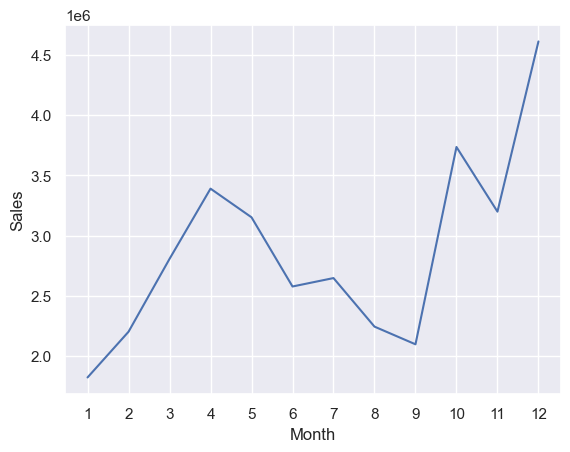

In [33]:
months = range(1,13)
plt.plot(months,df.groupby('month').sum()['Sales'])
plt.xticks(months)
plt.yticks()
plt.ylabel('Sales')
plt.xlabel('Month')

### <b>December</b> is the best month for selling products

## Q2) Which city orders the highest number of products

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [36]:
def city(s):
    s=s.split(',')
    return s[1]


In [37]:
df['city'] = df['Purchase Address'].apply(city)

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [45]:
df.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

Text(0, 0.5, 'No of orders')

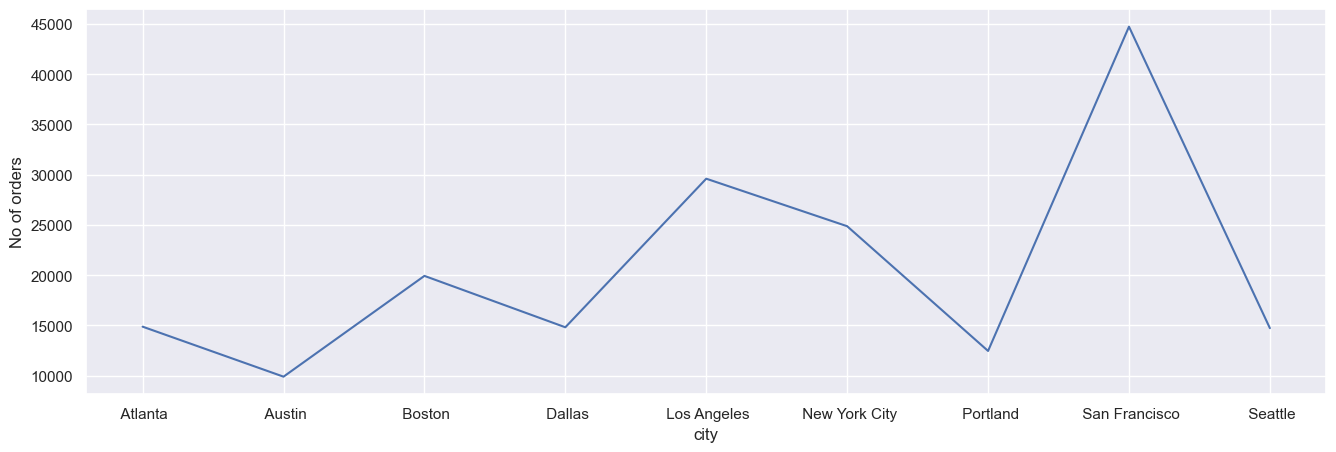

In [51]:
plt.figure(figsize=(16,5))
df.groupby('city')['city'].count().plot.line()
plt.ylabel('No of orders')

### <b>San Francisco</b> orders the highest number of products.

## Q3) What time of the day do people order the most goods online


In [52]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [56]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

/var/folders/kb/xjyg7zkj6pd3tgs_sm821pj80000gn/T/ipykernel_11350/3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [57]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
month                        int64
Sales                      float64
city                        object
dtype: object

In [58]:
df['Hour'] = df['Order Date'].dt.hour

In [59]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [61]:
df['Hour'].unique()

array([ 0,  7, 18, 15, 12, 22,  9, 23, 11, 13, 17, 19, 14, 16,  1,  6, 10,
       20, 21,  8,  3,  5,  2,  4], dtype=int32)

Text(0, 0.5, 'No of orders')

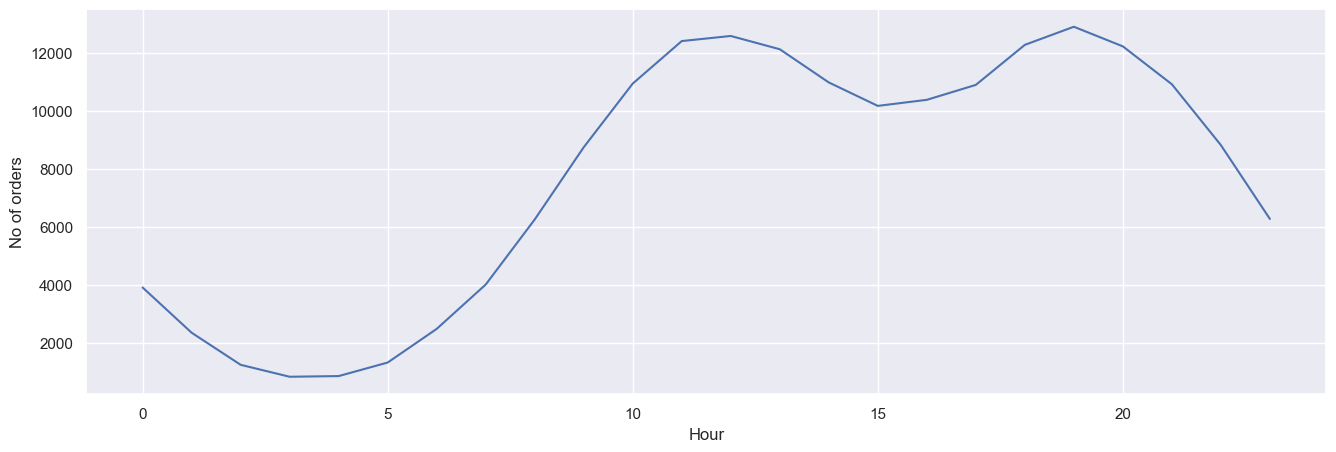

In [76]:
plt.figure(figsize=(16,5))
df.groupby('Hour')['Hour'].count().plot.line()
plt.ylabel('No of orders')

### <b> 10 AM to 12 PM</b> and <b>4 PM to 8 PM</b> receives the maximum number of orders.

## Q4) Which product has the highest demand and why?


Text(0.5, 0, 'Quantity Ordered')

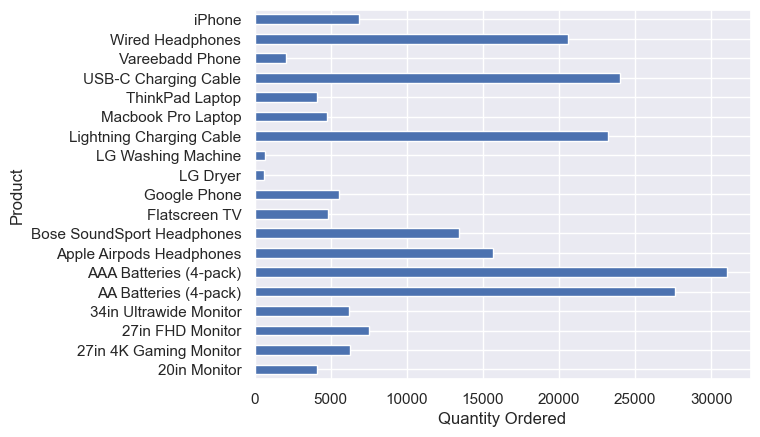

In [100]:
df.groupby('Product')['Quantity Ordered'].sum().plot.barh()
plt.xlabel('Quantity Ordered')

### <b>AAA Batteries(4-pack)</b> has the highest demand

In [93]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [103]:
df.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
count,185950,185950,185950.000000,185950.000000,185950,185950,185950.000000,185950.000000,185950,185950.000000
unique,178437,19,NaN,NaN,NaN,140787,NaN,NaN,9,NaN
top,160873,USB-C Charging Cable,NaN,NaN,NaN,"193 Forest St, San Francisco, CA 94016",NaN,NaN,San Francisco,NaN
freq,5,21903,NaN,NaN,NaN,9,NaN,NaN,44732,NaN
mean,NaN,NaN,1.124383,184.399735,2019-07-18 21:54:38.887550464,NaN,7.059140,185.490917,NaN,14.413305
min,NaN,NaN,1.000000,2.990000,2019-01-01 03:07:00,NaN,1.000000,2.990000,NaN,0.000000
25%,NaN,NaN,1.000000,11.950000,2019-04-16 21:05:15,NaN,4.000000,11.950000,NaN,11.000000
50%,NaN,NaN,1.000000,14.950000,2019-07-17 20:40:30,NaN,7.000000,14.950000,NaN,15.000000
75%,NaN,NaN,1.000000,150.000000,2019-10-26 08:14:00,NaN,10.000000,150.000000,NaN,19.000000
max,NaN,NaN,9.000000,1700.000000,2020-01-01 05:13:00,NaN,12.000000,3400.000000,NaN,23.000000


In [107]:
df.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [108]:
df.groupby('Product')['Quantity Ordered'].mean()

Product
20in Monitor                  1.006828
27in 4K Gaming Monitor        1.002247
27in FHD Monitor              1.005728
34in Ultrawide Monitor        1.002912
AA Batteries (4-pack)         1.343004
AAA Batteries (4-pack)        1.502689
Apple Airpods Headphones      1.007203
Bose SoundSport Headphones    1.009906
Flatscreen TV                 1.003958
Google Phone                  1.001267
LG Dryer                      1.000000
LG Washing Machine            1.000000
Lightning Charging Cable      1.071983
Macbook Pro Laptop            1.000847
ThinkPad Laptop               1.000484
USB-C Charging Cable          1.094599
Vareebadd Phone               1.001453
Wired Headphones              1.088709
iPhone                        1.001023
Name: Quantity Ordered, dtype: float64

In [112]:
products = df.groupby('Product')['Quantity Ordered'].sum().index
quantity = df.groupby('Product')['Quantity Ordered'].sum()
prices = df.groupby('Product')['Price Each'].mean()

/var/folders/kb/xjyg7zkj6pd3tgs_sm821pj80000gn/T/ipykernel_11350/880118858.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 5000x3000 with 0 Axes>

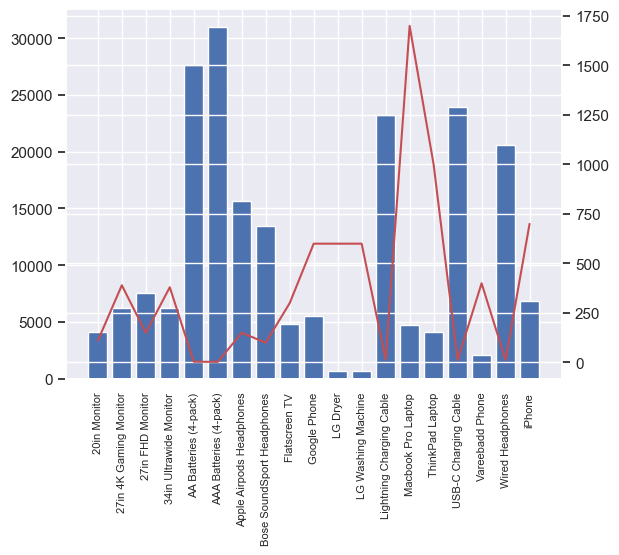

In [123]:
plt.figure(figsize=(50,30))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='b')
ax2.plot(products,prices,'r')
ax1.set_xticklabels(products,rotation='vertical',size=8)

### From the above plot we can conclude that the selling of a product depends on its price
<b>The more expensive the product, the lower will be the quantity ordered and vice versa</b>
